In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests
import time

In [2]:
api_key = "13fe5f7bcc0760f5b4e75565b29a71e6"


In [5]:
#Import CSV file, and read into DataFrame.

world_data = pd.read_csv("homework/WeatherPy-master/resources/worldcities.csv")

#Preview the data.
world_data.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [7]:
# Randomly select 500 cities for weather data.

selected_cities = world_data.sample(n=500)

#Visualize the selected cities DataFrame.

selected_cities

,Country,City,Latitude,Longitude
7477,co,toro,4.611667,-76.081389
19805,in,yellandu,17.600000,80.333333
11137,et,bati,11.183333,40.016667
25622,nl,nederweert,51.285013,5.749804
6001,cn,hebi,35.899167,114.192500
42327,us,garden grove,33.773889,-117.940556
34821,rs,badovinci,44.785833,19.371389
19786,in,waris aliganj,25.016667,85.633333
6805,co,dibulla,11.272506,-73.309107
29189,ph,nagcarlan,14.136400,121.416500


In [8]:
#Counter

row_count = 0

# Create blank columns for the necessary fields.

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

# Loop through and get the weather data using the Open Weather API.

for index, row in selected_cities.iterrows():
    #Sleep to help with the call limit
    
    time.sleep(1)
    
    #Open weather url.
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    #Print log to ensure the loop is working correctly.
    
    print("Now retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    #Run requests to grab the JSON at the requested URL
    
    city_weather = requests.get(query_url).json()
    
    
    #print(row["Latitude"],row["Longitude"])
#print(city_weather.keys())
    
    #Append the weather data to the appropriate columns.
    #Use try/except to skip any cities with errors.
    #selected_cities.append(requests.get(query_url + str(city_weather)).json())
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")
        #continue
selected_cities  

Now retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=4.611667&lon=-76.081389&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial


/Users/airtonkamdem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/airtonkamdem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/airtonkamdem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/airtonkamdem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=17.6&lon=80.333333&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial
Now retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=11.183333&lon=40.016667&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial
Now retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=51.285013&lon=5.749804&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial
Now retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=35.899167&lon=114.1925&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial
Now retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=33.773888899999996&lon=-117.94055559999998&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial
Now retieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=44.785833000000004&lon=19.371389&appid=13fe5f7bcc0760f5b4e75565b29a71e6&units=Imperial
Now retieving city # 7
https://api.openweathermap.org/data/2.

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
7477,co,toro,4.611667,-76.081389,74.68,73,20,3.36
19805,in,yellandu,17.600000,80.333333,84.3,54,32,8.63
11137,et,bati,11.183333,40.016667,84.26,39,48,4.38
25622,nl,nederweert,51.285013,5.749804,52.29,66,75,24.16
6001,cn,hebi,35.899167,114.192500,35.7,70,0,1.81
42327,us,garden grove,33.773889,-117.940556,48.27,93,20,4.7
34821,rs,badovinci,44.785833,19.371389,62.44,42,20,9.17
19786,in,waris aliganj,25.016667,85.633333,69.72,61,0,4.27
6805,co,dibulla,11.272506,-73.309107,82.4,69,75,14.99
29189,ph,nagcarlan,14.136400,121.416500,77.27,78,20,6.93


SyntaxError: invalid syntax (<ipython-input-10-1fba9523b0fa>, line 1)

In [11]:
selected_cities.to_csv("WorldWeatherData.csv", index=False)


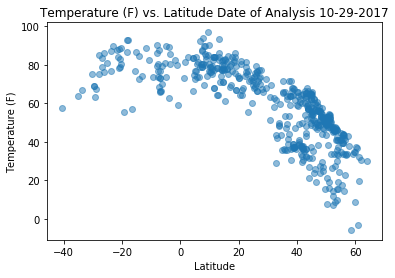

In [12]:
plt.scatter(selected_cities["Latitude"],selected_cities["Temperature"], alpha = 0.5)

plt.title("Temperature (F) vs. Latitude Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

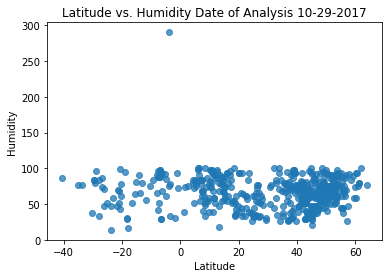

In [13]:
plt.scatter(selected_cities["Latitude"],selected_cities["Humidity"], alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

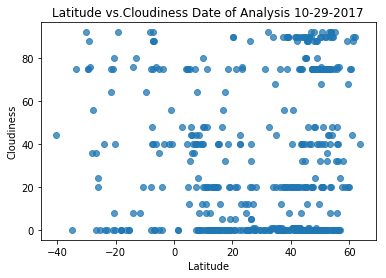

In [14]:
plt.scatter(selected_cities["Latitude"],selected_cities["Cloudiness"], alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

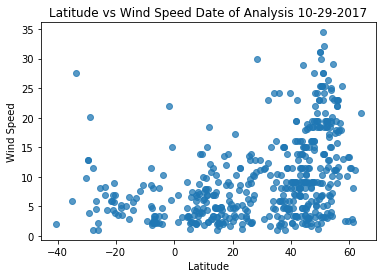

In [15]:
plt.scatter(selected_cities["Latitude"],selected_cities["Wind Speed"], alpha= 0.75)
plt.title("Latitude vs Wind Speed Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

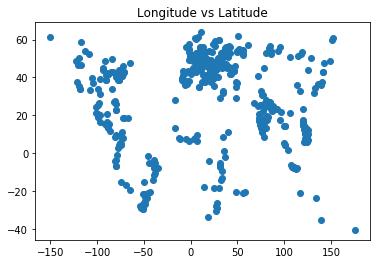

In [16]:
plt.scatter(selected_cities["Longitude"],selected_cities["Latitude"])
plt.title("Longitude vs Latitude")
plt.show()